# Importing the Data: Left & Right wing

In [904]:
"""
Function to import all files from the appropriate folders
"""

import glob
import pandas as pd
import numpy as np

path =r'/Users/Rula/Documents/Data/LeftRight/Left' 
files_left = glob.glob(path + "/*.csv")

#print("Left Files:")
#for file in files_left:
 #   print(file)
#print("\n")

path =r'/Users/Rula/Documents/Data/LeftRight/Right'
files_right = glob.glob(path + "/*.csv")

#print("Right Files:")
#for file in files_right:
#    print(file)
#print("\n")

# Reading in the data 

In [905]:
"""
Reader
    Read in all CSV and other files 
    Convert data into Panda Tables
    Label all text into the appropriate classes, Right =1, Left =0
    
    """
#This function reads in the CSV files
def file_reader(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file)
        df = df.drop(df.columns[[1, 2]], axis=1)
        series = df.apply(lambda x: " ".join([str(x[i]) for i in range(len(x))]),axis=0)
        content = pd.Series.to_frame(series, name='content')
        dfs.append(content)
    concatenated_files = pd.concat(dfs, ignore_index=True)
    #In this function we are numbering each of the files according to their 'label'
#For the left wing manifestos we have given them a '0', otherwise we give them a 1
    column_num = concatenated_files.columns.values
    if files == files_left:
        labels_numpy_array = np.zeros(len(concatenated_files), dtype=int, order='C')
    else:
        labels_numpy_array = np.ones(len(concatenated_files), dtype=int, order='C')
    labels_df = pd.DataFrame(labels_numpy_array,columns=['labels'], dtype=int) 
    return pd.concat([concatenated_files, labels_df], axis=1) 

left = file_reader(files_left)
right = file_reader(files_right)

#Here we end up getting a pandas dataframe with all the manifestos split into two groups, and their label
#Each row is the individual manifestos, column 1 is the index, 2 is the manifesto content, and 3 are labels 

# print("\n" + "Right Wing Manifestos" + "\n")
# print(left)

# print("\n" + "Left Wing Manifestos" + "\n")
# print(right)


#we concatenate all the files to construct one pandaframe to make all the data processing easier 
raw_manifestos = pd.concat([left,right], axis=0, ignore_index=True)
# print("\n" + "All Manifestos" + "\n")
# print(raw_manifestos)

#print(left)

# Preprocessing Functions

In [906]:
""" 
Preprocessing: Cleaning our data
    Import library for regular expression operations
    Import the NLTK Library
        Split corpus on white noise, and punctuation  
        Lower case all words
        Remove all stopwords, and make list of all words to removed from the corpus    
"""

import re
from nltk.corpus import stopwords
words_to_remove = ['i', 'me','my', 'gaelscoileanna',  'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
                    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
                    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
                    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
                    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 
                   'now', '\n', 'the''coder', 'name', 'ï‚· ', 'michelle', 'springfield', 'date', 
                   '©', 'labour', 'conservative', 'coding', 'introduction', 'preamble', 'finished', 'sdlp', 
                   'fine', 'gael', 'republicans', 'federal', 'states',
                   'would', 'new','conservative party', 'democratic unionist', 'american', 'scottish', 'british', 
                   'irish', 'welsh', 'party', 'green party', 'labour party', 'america', 
                   'progressive democrats' , 'scottish nationalist party',
                   'social democratic and labour party', 'socialist party',
                   'co','romney','edwards', 'lucas', 'south', 'ar', 
                   'ocht', 'took','three','going','st', 'ten', 'four','north',
                    'g', 'olds','take', 'put','na', 'u', 'eu','plaid', 'upon', 
                    'clinton','may','would', 'new', 'congress','would', 'obama',
                    'see', 'london', 'caroline', 'garda', 'scots', 'per', 
                    'le', 'also', 'tories', 'also', 'n', 'westminster', 'gore', 
                    'bob', 'cuba', 'va', 'taiwan', 'become', 'day', 'president',
                    'ulster', 'ulster', 'rather', 'washington', 'one',
                   'the party of wales', 'ukip', 'ulster unionist', 'ireland',
                   'united left alliance', 'democrat', 'republican', 'britain', 'scotland', 
                   'wales', 'northern ireland' 'sutton', 'cymru', 'ghaeilge', 'al', 'gaeltacht', 'bush', 
                    'f', 'kfc', 'english','malaysia', 'vets',  'ollective',
                    'politicians', 'al', 'f', 'bush', 'kelo', 'protectionadditional', 
                    'supportinvestment', 'gaeltacht', 'yearolds', 'tessas', 'ugandan',
                    'ghaeilge', 'fianna fail', 'fine gael', 'sinn', 'fein',  'snp',
                   'Thatâ€™s', 'FÃ©in', 'â€“', 'www', 'greenpartyni', 'org','www', 'scottishgreens', 
                   'org', 'manifesto', 'information', 'metadata', 'title', 'england', 'wales', 
                   'green', 'scotland', 'northern', 'ireland', 'uk',
                  'press', 'office', 'enquiries', 'relating', 'content', 'copyright', 'mr', 'blair',
                   'rt', 'hon', 'john', 'major', 'p', 'coder', 'united kingdom', 'te reo', 'te', 'reo',
                  '\n', 'the''coder', 'name', 'ï‚· ', 'michelle', 'springfield', 'date', 
                   '©', 'labour', 'conservative', 'coding', 'introduction', 'preamble', 'finished', 'sdlp', 
                   'fine', 'gael', 'republicans', 'federal', 'states',
                   'would', 'new','conservative party', 'democratic unionist', 'american', 'scottish', 'british', 
                   'irish', 'welsh', 'party', 'green party', 'labour party', 'america', 
                   'progressive democrats' , 'scottish nationalist party',
                   'social democratic and labour party', 'socialist party',
                   'co','romney','edwards', 'lucas', 'south', 'ar', 
                   'ocht', 'took','three','going','st', 'ten', 'four','north',
                    'g', 'olds','take', 'put','na', 'u', 'eu','plaid', 'upon', 
                    'clinton','may','would', 'new', 'congress','would', 'obama',
                    'see', 'london', 'caroline', 'garda', 'scots', 'per', 
                    'le', 'also', 'tories', 'also', 'n', 'westminster', 'gore', 
                    'bob', 'cuba', 'va', 'taiwan', 'become', 'day', 'president',
                    'ulster', 'ulster', 'rather', 'washington', 'one',
                   'the party of wales', 'ukip', 'ulster unionist', 'ireland',
                   'united left alliance', 'democrat', 'republican', 'britain', 'scotland', 
                   'wales', 'northern ireland' 'sutton', 'cymru', 'ghaeilge', 'al', 'gaeltacht', 'bush', 
                    'f', 'kfc', 'english','malaysia', 'vets',  'ollective',
                     'plaid cymru', 'www', 'zealand', 'aboriginal', 'canada', 'uk', 'alexa mcdonough',
                   'au canada', 'au pays', 'barnett formula', 'ndp', 'comhaontas glas',
                   'de notre', 'de nouveaux', 'de plus', 'de stephen', 'il pds', 'nz',
                   'snp', 'tangata whenua', 'te tiriti', 'te reo', 'tiriti', 'waitangi', 
                  'fianna il', 'fianna', 'comhaontas', 'glas', 'il', 'sinn', 'fein', 'féin',
                  'eight', 'five', 'europe', 'democrats', 'il', 'fianna', 'hap', 'iwi', 
                   'zealand', 'superannuation','first', 'aboriginal','canada','uk', 
                   'alexa', 'mcdonough', 'au', 'canada', 'pays','barnett', 'formula','ndp','comhaontas', 
                   'glas', 'de', 'notre','nouveaux', 'plus', 'stephen', 'pds', 'nz', 
                   'snp', 'tangata', 'whenua', 'tiriti',  'reo', 'et', 'des', 'paul', 
                   ' Dr. Alasdair McDonnell', 'Program-specific title: ', 'Partyâ€™s']

# 'liberal party of australia', 'liberal national party of queensland',
#                    'palmer united party', 'australian greens', "katter's" ,'australian party',
#                    'national party of australia', 'australian labor party', 'australian democrats', 


# words_to_remove = ['i', 'me','my', 'gaelscoileanna',  'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
#                     'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
#                     'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
#                     'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
#                     'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
#                     'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
#                     'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
#                     'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
#                     'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
#                     'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
#                     'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
#                     'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 
#                    'now', '\n', 'the''coder', 'name', 'ï‚· ', 'michelle', 'springfield', 'date', 
#                    '©', 'labour', 'conservative', 'coding', 'introduction', 'preamble', 'finished', 'sdlp', 
#                    'fine', 'gael', 'republicans', 'federal', 'states',
#                    'would', 'new','conservative party', 'democratic unionist', 'american', 'scottish', 'british', 
#                    'irish', 'welsh', 'party', 'green party', 'labour party', 'america', 
#                    'progressive democrats' , 'scottish nationalist party',
#                    'social democratic and labour party', 'socialist party',
#                    'co','romney','edwards', 'lucas', 'south', 'ar', 
#                    'ocht', 'took','three','going','st', 'ten', 'four','north',
#                     'g', 'olds','take', 'put','na', 'u', 'eu','plaid', 'upon', 
#                     'clinton','may','would', 'new', 'congress','would', 'obama',
#                     'see', 'london', 'caroline', 'garda', 'scots', 'per', 
#                     'le', 'also', 'tories', 'also', 'n', 'westminster', 'gore', 
#                     'bob', 'cuba', 'va', 'taiwan', 'become', 'day', 'president',
#                     'ulster', 'ulster', 'rather', 'washington', 'one',
#                    'the party of wales', 'ukip', 'ulster unionist', 'ireland',
#                    'united left alliance', 'democrat', 'republican', 'britain', 'scotland', 
#                    'wales', 'northern ireland' 'sutton', 'cymru', 'ghaeilge', 'al', 'gaeltacht', 'bush', 
#                     'f', 'kfc', 'english','malaysia', 'vets',  'ollective',
#                     'politicians', 'al', 'f', 'bush', 'kelo', 'protectionadditional', 
#                     'supportinvestment', 'gaeltacht', 'yearolds', 'tessas', 'ugandan',
#                     'ghaeilge', 'fianna fail', 'fine gael', 'sinn', 'fein',  'snp',
#                    'Thatâ€™s', 'FÃ©in', 'â€“', 'www', 'greenpartyni', 'org','www', 'scottishgreens', 
#                    'org', 'manifesto', 'information', 'metadata', 'title', 'england', 'wales', 
#                    'green', 'scotland', 'northern', 'ireland', 'uk',
#                   'press', 'office', 'enquiries', 'relating', 'content', 'copyright', 'mr', 'blair',
#                    'rt', 'hon', 'john', 'major', 'p', 'coder', 'united kingdom', 'te reo', 'te', 'reo',
#                   '\n', 'the''coder', 'name', 'ï‚· ', 'michelle', 'springfield', 'date', 
#                    '©', 'labour', 'conservative', 'coding', 'introduction', 'preamble', 'finished', 'sdlp', 
#                    'fine', 'gael', 'republicans', 'federal', 'states',
#                    'would', 'new','conservative party', 'democratic unionist', 'american', 'scottish', 'british', 
#                    'irish', 'welsh', 'party', 'green party', 'labour party', 'america', 
#                    'progressive democrats' , 'scottish nationalist party',
#                    'social democratic and labour party', 'socialist party',
#                    'co','romney','edwards', 'lucas', 'south', 'ar', 
#                    'ocht', 'took','three','going','st', 'ten', 'four','north',
#                     'g', 'olds','take', 'put','na', 'u', 'eu','plaid', 'upon', 
#                     'clinton','may','would', 'new', 'congress','would', 'obama',
#                     'see', 'london', 'caroline', 'garda', 'scots', 'per', 
#                     'le', 'also', 'tories', 'also', 'n', 'westminster', 'gore', 
#                     'bob', 'cuba', 'va', 'taiwan', 'become', 'day', 'president',
#                     'ulster', 'ulster', 'rather', 'washington', 'one',
#                    'the party of wales', 'ukip', 'ulster unionist', 'ireland',
#                    'united left alliance', 'democrat', 'republican', 'britain', 'scotland', 
#                    'wales', 'northern ireland' 'sutton', 'cymru', 'ghaeilge', 'al', 'gaeltacht', 'bush', 
#                     'f', 'kfc', 'english','malaysia', 'vets',  'ollective',
#                      'plaid cymru', 'www', 'zealand', 'aboriginal', 'canada', 'uk', 'alexa mcdonough',
#                    'au canada', 'au pays', 'barnett formula', 'ndp', 'comhaontas glas',
#                    'de notre', 'de nouveaux', 'de plus', 'de stephen', 'il pds', 'nz',
#                    'snp', 'tangata whenua', 'te tiriti', 'te reo', 'tiriti', 'waitangi', 
#                   'fianna il', 'fianna', 'comhaontas', 'glas', 'il', 'sinn', 'fein', 'féin',
#                   'eight', 'five', 'europe', 'democrats', 'il', 'fianna', 'hap', 'iwi', 
#                    'zealand', 'superannuation','first', 'aboriginal','canada','uk', 
#                    'alexa', 'mcdonough', 'au', 'canada', 'pays','barnett', 'formula','ndp','comhaontas', 
#                    'glas', 'de', 'notre','nouveaux', 'plus', 'stephen', 'pds', 'nz', 
#                    'snp', 'tangata', 'whenua', 'tiriti',  'reo', 'european']

 
                   
#                    'liberal party of australia', 'liberal national party of queensland',
#                    'palmer united party', 'australian greens', "katter's" ,'australian party',
#                    'national party of australia', 'australian labor party', 'australian democrats'] 
# #                    ' Dr. Alasdair McDonnell', 'Program-specific title: ', 'Partyâ€™s']
#                   'jim', 'anderton','jen shipley', 'kiwi', 'kiwisaver','manaakitanga',
#                    'rangatiratanga','whanaungatanga','kotahitanga', 'wairuatanga',
#                    'mana','whenua','kaitiakitanga','TÅ«','puna', 'Te  Reo', 
#                    'rangatira','kengatanga','whirinakitanga','whakapono','tÅ manako ',
#                    'whÄnau','taonga' ,  'tamaiti','kiwibank','paul','marten','leinster']


#lost of Gaelic terms to remove from the manifestos, also analyse further words to remove


def tokenize(manifesto):

    letters_only = re.sub("[^a-zA-Z]", " ", manifesto) 

    words = letters_only.lower().split() 

    stops = set(stopwords.words("english"))

    meaningful_words = [word for word in words if not word in stops]
    
    meaningful_words = [word for word in meaningful_words if not word in words_to_remove]

    return  meaningful_words 

# Clean

In [907]:
"""Clean
        Uses the clean function function to clean the entire left corpus
"""

clean_left_manifestos = []
for content in left['content']:
	clean_left_manifestos.append(( tokenize( content ))) #" ".join( tokenize( content )))

#uses the clean functions to clean right
clean_right_manifestos = []
for content in right['content']:
	clean_right_manifestos.append(( tokenize( content )))#" ".join( tokenize( content )))


#Construct Data Sets

left_man = np.array(clean_left_manifestos)
left_labels = np.zeros(len(left_man), dtype='int')

left_mani_trans = (left_man[None][:].T)
left_labs_trans = (left_labels[None][:].T)

left_manifestos = np.concatenate((left_mani_trans,left_labs_trans), axis=1)

print(left_manifestos.shape)

(58, 2)


In [908]:
right_man = np.array(clean_right_manifestos)
right_labels = np.ones(len(right_man), dtype='int')

right_mani_trans = (right_man[None][:].T)
right_labs_trans = (right_labels[None][:].T)

right_manifestos = np.concatenate((right_mani_trans,right_labs_trans), axis=1)

print(right_manifestos.shape)

(51, 2)


In [909]:
all_manifestos = np.concatenate((left_manifestos,right_manifestos), axis=0)

all_manifesto_content = all_manifestos[:,0]
manifesto_content = all_manifesto_content[None][:].T
print(manifesto_content.shape)
# print(manifesto_content)

#print(manifesto_content[1][0])

(109, 1)


In [910]:
""" Labels:
        Right Labels = 1
        Left Labels = 0
        """


manifesto_labels = all_manifestos[:, 1]
#print(manifesto_labels)

print(manifesto_labels.shape)

(109,)


In [911]:
n = len(raw_manifestos)  #number of items

In [912]:
manifesto_new = []
for i in range(n):
    manifesto_new.append(' '.join(word for word in manifesto_content[i][0]))
    

In [913]:
# """ Constructing a key which will include all unique words spanning entire corpus. 
#     Any additional documents will be added to the set. 
#     This is then sorted by alphabetical order

# """


# # Use set comprehension to get unique words in the whole dataset
# # make it to list and sort to get a dictionary (in order to get index for one-hot form later)"
# vocab_dict = []
# for doc in all_manifesto_content:
#     [vocab_dict.append(word) for word in doc]
# vocab_dict = sorted(list(set(vocab_dict)))

# print(len(vocab_dict))
# print(vocab_dict[0:50])

# #print(type(total_dict))

# # train_list = [words for segments in train_filtered for words in segments.split()]
# # train_unique = set(train_list)

# # test_list = [words for segments in test_filtered for words in segments.split()]
# # test_unique = sorted(list(set(test_list)))

# #to find all the unique words
# # train_unique = [] 
# # for i in train_list:
# #       if not i in train_unique:
# #           train_unique.append(i);

In [914]:
# """
# Constructing the word frequency table
# """

# word_freq = np.zeros([58, len(vocab_dict)])
# for line in range(len(all_manifesto_content)):
#     for word in range(len(vocab_dict)):
#         word_freq[line, word] = all_manifesto_content[line].count(vocab_dict[word])
        
        

#sum rows, and sort to get most common words 



In [915]:
# """
# By Row for each doc
# """
# doc_count = np.sum(word_freq, 1)
# print('Words in Each Document')
# print(doc_count)
# print(doc_count.shape)

In [916]:
# """
# Column Count
# """
# col_count = np.sum(word_freq, 0)
# print(col_count)
# print(len(col_count))
# col_countt = (col_count[None][:])
# print(col_countt.shape)
# print(word_freq.shape)
# new_count = np.append(word_freq, col_countt, axis=0)

# print(new_count.shape)

In [917]:
# sumsum = sum(sum(word_freq))
# s = np.asarray(sumsum).reshape(1, -1)[0,:]

# doc_count_trans = (doc_count[None][:].T)
# total = (s[None][:])

# #row_totalAppended = np.append('total', total, axis=0)

# print(doc_count_trans.shape)
# print(total)

# doc_totalAppended = np.append(doc_count_trans, total, axis=0)
# print(doc_totalAppended.shape)

# print(new_count.shape)
# print(doc_totalAppended.shape)

In [918]:
# """
# Frequency Table
#     Ordering the frequency table from most frequent word to least.
# """

# freq_table = np.append(new_count, doc_totalAppended, axis=1)

# print('\n' + 'Size of Frequency Table' + '\n')
# print(freq_table.shape)


# #order using argsort, by the total number count for each feature
# features = new_count[:,new_count[58,:].argsort()[::-1]]

# #selected_features = features[0:36, 5000]

# all_features = features [:, 0:10000]

# print('Shape of chosen words')
# print(all_features.shape)



In [919]:
""" Counting all the text
        All the texts have been transformed into features with bigrams
"""

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',ngram_range=(2,2),stop_words='english',
                      min_df=3,max_features=2000)
unis = vectorizer.fit_transform(manifesto_new).toarray()

#vectorizerTFIDF.fit_transform(corpus).toarray(), x_dates

In [920]:
"""
Train & test split
            
"""

from sklearn.cross_validation import train_test_split

#Manifesto Labels = ytrain, ytest
#manifesto_labels
#features is the ordered table 

"""Train and Test"""
#using the train/test split module to split the indices of our data.
#80% of the manifestos are used for training, remainig 20% validation set
#we sample randomly 


train_i, test_i = train_test_split( np.arange( len( all_manifesto_content )), train_size = 0.8, random_state = 44 )

xtrain = unis[train_i]

xdev = unis[test_i]

In [921]:
""" Labels:
        Right Labels = 1
        Left Labels = 0
        """


manifesto_labels = all_manifestos[:, 1]
#print(manifesto_labels)

print(manifesto_labels.shape)



(109,)


In [922]:
"""
Constructing the label vectors, and development set
"""
y_train = manifesto_labels[train_i]
ytrain = np.matrix(y_train, dtype=int)
ytrain = np.reshape(y_train, [len(xtrain),1])
np.shape(ytrain)

y_dev = manifesto_labels[test_i]
ydev = np.matrix(y_dev, dtype=int)
ydev = np.reshape(y_dev, [len(xdev), 1])

print("\n" + "Length of Train" + "\n")
print(np.shape(ytrain))


print("\n" + "Length of Dev Set" + "\n")
print(np.shape(ydev))


ytrain = ytrain.astype(dtype=float)

ydev = ydev.astype(dtype=float)

#Need to do Unseen Test Set


Length of Train

(87, 1)

Length of Dev Set

(22, 1)


In [923]:



# """
# Chi-Square 
# """
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2


# xtrain = SelectKBest(chi2, k=2).fit_transform(xtrain, ytrain)
# xdev = SelectKBest(chi2, k=2).transform(x_dev)

In [924]:
"""
Chi-Square 
"""
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFE



# RFE 

In [925]:
# from sklearn.linear_model import LogisticRegression

# LR = LogisticRegression()
# logReg = LR.fit(xtrain, ytrain)

# rfe_LR = RFE(logReg, 50).fit(xtrain, ytrain)

# print(rfe_LR.support_)
# print(rfe_LR.ranking_)

# rfe_LR_prediction = logReg.predict(xdev)

# rfe_LR_accuracy = accuracy_score(ydev, rfe_LR_prediction)

# print(rfe_LR_accuracy)



# Modelling

In [926]:

# """
# Gaussian NAIVE BAYES
# """
# from sklearn.naive_bayes import GaussianNB

# GNB = GaussianNB()

# GNB.fit(xtrain, ytrain)

# rfe_GNB = RFE(GB, 50).fit(xtrain, ytrain)


# print(rfe_GNB.support_)
# print(rfe_GNB.ranking_)


# """
# Train on Dev Set
# """

# rfe_GNB_prediction = GNB.predict(xdev)



# """
# Evaluation 
# """

# rfe_GNB_accuracy = accuracy_score(ydev, rfe_GNB_prediction)
# rfe_GNB_f1 = f1_score(ydev, rfe_GNB_prediction)




In [927]:
"""
Multinomial NAIVE BAYES
"""

from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

NB = MNB.fit(xtrain, ytrain)


rfe_NB = RFE(NB, 100).fit(xtrain, ytrain)

print(rfe_NB.support_)
print(rfe_NB.ranking_)

"""
Train on Dev Set
"""
MNB_prediction = MNB.predict(xdev)

"""
Evaluation 
"""
MNB_accuracy = accuracy_score(ydev, MNB_prediction)
MNB_f1 = f1_score(ydev, MNB_prediction)


MNB_p = precision_score(ydev, MNB_prediction)
MNB_r = recall_score(ydev, MNB_prediction)


[False False False ..., False False  True]
[ 107   39  660 ..., 1035 1499    1]


In [928]:
"""
Linear SUPPORT VECTOR MACHINE
"""

from sklearn import svm

svmL = svm.SVC( kernel="linear")



svmL = svmL.fit(xtrain, ytrain)


rfe_SVM = RFE(svmL, 200).fit(xtrain, ytrain)

print(rfe_SVM.support_)
print(rfe_SVM.ranking_)

"""
Train on Dev Set
"""
svmL_prediction = svmL.predict(xdev)

"""
Evaluation 
"""
svmL_accuracy = accuracy_score(ydev, svmL_prediction)
svmL_f1 = f1_score(ydev, svmL_prediction)


svmL_p = precision_score(ydev, svmL_prediction)
svmL_r = recall_score(ydev, svmL_prediction)

[False False False ..., False  True  True]
[ 634 1430 1313 ...,  260    1    1]


In [929]:
"""
RBF SUPPORT VECTOR MACHINE
"""

# from sklearn import svm

# svmRBF = svm.SVC(kernel="rbf")

# svmRBF = svmRBF.fit(xtrain, ytrain)



# rfe_SVMRBF = RFE(svmRBF, 50).fit(xtrain, ytrain)

# print(rfe_SVMRBF.support_)
# print(rfe_SVMRBF.ranking_)

# """
# Train on Dev Set
# """
# svmRBF_prediction = svmRBF.predict(xdev)

# """
# Evaluation 
# """
# svmRBF_accuracy = accuracy_score(ydev, svmRBF_prediction)
# svmRBF_f1 = f1_score(ydev, svmRBF_prediction)



'\nRBF SUPPORT VECTOR MACHINE\n'

In [ ]:
"""
Logistic Regression
"""
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model


lr = linear_model.LogisticRegression()

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

grid = GridSearchCV(lr, param_grid=dict(alpha=alphas))


logReg = grid.fit(xtrain, ytrain)

rfe_LR = RFE(logReg, 300).fit(xtrain, ytrain)

print(rfe_LR.support_)
print(rfe_LR.ranking_)



"""
Train on Dev Set
"""
LogReg_prediction = logReg.predict(xdev)

"""
Evaluation 
"""
logReg_accuracy = accuracy_score(ydev, LogReg_prediction)
logReg_f1 = f1_score(ydev, LogReg_prediction)


logReg_p = precision_score(ydev, LogReg_prediction)
logReg_r = recall_score(ydev, LogReg_prediction)

In [931]:
# """
# Ensemble Methods Classifier
# """

# from mlxtend.classifier import EnsembleVoteClassifier

# eclf = EnsembleVoteClassifier(clfs=[logReg, svmL, MNB],
#                               weights=[3, 1, 1], voting='soft')



# eclf = eclf.fit(xtrain, ytrain)

# rfe_E = RFE(eclf, 200).fit(xtrain, ytrain)

# print(rfe_E.support_)
# print(rfe_E.ranking_)



# """
# Train on Dev Set
# """
# E_pred = logReg.predict(xdev)

# """
# Evaluation 
# """
# eclf_accuracy = accuracy_score(ydev, E_pred)
# eclf_f1 = f1_score(ydev, E_pred)




# Model Evaluation: Accuracy and F1 Score

In [932]:

print("Multinomial Naive Bayes Prediction: Accuracy, F1, Precision, Recall")
print([MNB_accuracy, MNB_f1, MNB_p, MNB_r])

print("Support Vector Machine (Linear):Accuracy, F1, Precision, Recall")
print([svmL_accuracy, svmL_f1,svmL_p, svmL_r ])

print("Logistic Regression Prediction: Accuracy, F1, Precision, Recall")
print(logReg_accuracy, logReg_f1, logReg_p, logReg_r)



Multinomial Naive Bayes Prediction: Accuracy, F1, Precision, Recall
[0.59090909090909094, 0.52631578947368418, 0.5, 0.55555555555555558]
Support Vector Machine (Linear):Accuracy, F1, Precision, Recall
[0.45454545454545453, 0.33333333333333331, 0.33333333333333331, 0.33333333333333331]
Logistic Regression Prediction: Accuracy, F1, Precision, Recall
(0.5, 0.35294117647058826, 0.375, 0.33333333333333331)


In [934]:
tests = test_manifestos

In [935]:
import glob
import pandas as pd
import numpy as np

path =r'/Users/Rula/Documents/Data/Aussie/Left' 
test_left = glob.glob(path + "/*.csv")

path =r'/Users/Rula/Documents/Data/Aussie/Right'
test_right = glob.glob(path + "/*.csv")


"""
Reader
    Read in all CSV and other files 
    Convert data into Panda Tables
    Label all text into the appropriate classes, Right =1, Left =0
    
    """
#This function reads in the CSV files
def file_reader(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file)
        df = df.drop(df.columns[[1, 2]], axis=1)
        series = df.apply(lambda x: " ".join([str(x[i]) for i in range(len(x))]),axis=0)
        content = pd.Series.to_frame(series, name='content')
        dfs.append(content)
    concatenated_files = pd.concat(dfs, ignore_index=True)
    #In this function we are numbering each of the files according to their 'label'
#For the left wing manifestos we have given them a '0', otherwise we give them a 1
    column_num = concatenated_files.columns.values
    if files == files_left:
        labels_numpy_array = np.zeros(len(concatenated_files), dtype=int, order='C')
    else:
        labels_numpy_array = np.ones(len(concatenated_files), dtype=int, order='C')
    labels_df = pd.DataFrame(labels_numpy_array,columns=['labels'], dtype=int) 
    return pd.concat([concatenated_files, labels_df], axis=1) 

left_test = file_reader(test_left)
right_test = file_reader(test_right)


test_manifestos = pd.concat([left_test,right_test], axis=0, ignore_index=True)

"""Clean
        Uses the clean function function to clean the entire left corpus
"""

left_t = []
for content in left_test['content']:
	left_t.append(( tokenize( content ))) 
#uses the clean functions to clean right
right_t = []
for content in right_test['content']:
	right_t.append(( tokenize( content )))
    
    
"""Clean
        Uses the clean function function to clean the entire left corpus
"""


left_manT = np.array(left_t)
left_labelsT = np.zeros(len(left_manT), dtype='int')

left_mani_transT = (left_manT[None][:].T)
left_labs_transT = (left_labelsT[None][:].T)


left_manifestosT = np.concatenate((left_mani_transT,left_labs_transT), axis=1)

right_manT = np.array(right_t)
right_labelsT = np.ones(len(right_manT), dtype='int')

right_mani_transT = (right_manT[None][:].T)
right_labs_transT = (right_labelsT[None][:].T)

right_manifestosT = np.concatenate((right_mani_transT,right_labs_transT), axis=1)


test_manf = np.concatenate((left_manifestosT,right_manifestosT), axis=0)

test_man_con = test_manf[:,0]
test_manifestos = test_man_con[None][:].T
print(test_manifestos.shape)
# print(manifesto_content)

test_manifesto = test_manifestos.tolist()

test_man = []
for i in range(30):
    test_man.append(' '.join(word for word in test_manifesto[i][0]))

test_manifestos = np.array(test_man)


x_test = vectorizer.transform(test_manifestos)
xtest = x_test.todense()

"""
Constructing the y labels
"""

test_labels = test_manf[:, 1]

y = np.matrix(test_labels, dtype=int)
ytest = np.reshape(y, [30,1])


(30, 1)


In [936]:

print(test_labels)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [937]:
print(test_manf)

[[ ['australian', 'greens', 'policy', 'snapshots', 'greens', 'welcome', 'snapshot', 'policies', 'australian', 'greens', 'find', 'highlights', 'broad', 'ranging', 'policies', 'policies', 'full', 'visit', 'greens', 'health', 'forests', 'biodiversity', 'water', 'rivers', 'wetlands', 'education', 'investing', 'future', 'higher', 'education', 'national', 'security', 'peace', 'security', 'iraq', 'economics', 'people', 'earth', 'fair', 'tax', 'system', 'sustainable', 'world', 'economy', 'climate', 'change', 'energy', 'genetic', 'engineering', 'sustainable', 'agriculture', 'nuclear', 'issues', 'transport', 'work', 'industrial', 'relations', 'social', 'welfare', 'indigenous', 'australians', 'welcome', 'refugees', 'democracy', 'women', 'rights', 'sexuality', 'gender', 'identity', 'young', 'people', 'animal', 'welfare', 'arts', 'cultural', 'activities', 'cover', 'images', 'tarkine', 'forest', 'tasmania', 'cover', 'picture', 'myrtle', 'tree', 'coupe', 'fy', 'c', 'tarkine', 'forest', 'tasmania', 's

In [938]:
"""
Running on Test Set
"""
MNBtest = MNB.predict(xtest)
svmLtest = svmL.predict(xtest)
logRegTest = rfe_LR.predict(xtest)


print("Multinomial Naive Bayes Prediction: Accuracy, F1, Precision, Recall")
MNB_accuracyT = accuracy_score(ytest, MNBtest)
MNB_f1T = f1_score(ytest, MNBtest)
MNB_pT = precision_score(ytest, MNBtest)
MNB_rT = recall_score(ytest, MNBtest)

print([MNB_accuracyT, MNB_f1T, MNB_pT, MNB_rT])

print("Support Vector Machine (Linear):Accuracy, F1, Precision, Recall")

svmL_accuracyT = accuracy_score(ytest, svmLtest)
svmL_f1T = f1_score(ytest, svmLtest)
svmL_pT = precision_score(ytest, svmLtest)
svmL_rT = recall_score(ytest, svmLtest)

print([svmL_accuracyT, svmL_f1T,svmL_pT, svmL_rT ])


print("Logistic Regression Prediction: Accuracy, F1, Precision, Recall")
logReg_accuracyT = accuracy_score(ytest, logRegTest)
logReg_f1T = f1_score(ytest, logRegTest)

logReg_pT = precision_score(ytest, logRegTest)
logReg_rT = recall_score(ytest, logRegTest)

print(logReg_accuracyT, logReg_f1T, logReg_pT, logReg_rT)


Multinomial Naive Bayes Prediction: Accuracy, F1, Precision, Recall
[0.83333333333333337, 0.88372093023255827, 0.82608695652173914, 0.94999999999999996]
Support Vector Machine (Linear):Accuracy, F1, Precision, Recall
[0.76666666666666672, 0.81081081081081074, 0.88235294117647056, 0.75]
Logistic Regression Prediction: Accuracy, F1, Precision, Recall
(0.8666666666666667, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002)


# Unseen

In [939]:
"""
Running on Test Set
"""
MNBtest = MNB.predict(xtest)
svmLtest = svmL.predict(xtest)
logRegTest = rfe_LR.predict(xtest)


print("Multinomial Naive Bayes Prediction: Accuracy, F1, Precision, Recall")
MNB_accuracyT = accuracy_score(ytest, MNBtest)
MNB_f1T = f1_score(ytest, MNBtest)
MNB_pT = precision_score(ytest, MNBtest)
MNB_rT = recall_score(ytest, MNBtest)

print([MNB_accuracyT, MNB_f1T, MNB_pT, MNB_rT])

print("Support Vector Machine (Linear):Accuracy, F1, Precision, Recall")

svmL_accuracyT = accuracy_score(ytest, svmLtest)
svmL_f1T = f1_score(ytest, svmLtest)
svmL_pT = precision_score(ytest, svmLtest)
svmL_rT = recall_score(ytest, svmLtest)

print([svmL_accuracyT, svmL_f1T,svmL_pT, svmL_rT ])


print("Logistic Regression Prediction: Accuracy, F1, Precision, Recall")
logReg_accuracyT = accuracy_score(ytest, logRegTest)
logReg_f1T = f1_score(ytest, logRegTest)

logReg_pT = precision_score(ytest, logRegTest)
logReg_rT = recall_score(ytest, logRegTest)

print(logReg_accuracyT, logReg_f1T, logReg_pT, logReg_rT)




Multinomial Naive Bayes Prediction: Accuracy, F1, Precision, Recall
[0.83333333333333337, 0.88372093023255827, 0.82608695652173914, 0.94999999999999996]
Support Vector Machine (Linear):Accuracy, F1, Precision, Recall
[0.76666666666666672, 0.81081081081081074, 0.88235294117647056, 0.75]
Logistic Regression Prediction: Accuracy, F1, Precision, Recall
(0.8666666666666667, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002)


In [940]:
print(MNBtest)

[ 0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [941]:
print(ytest)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [942]:
ytests = (np.squeeze(ytest))

misMNB = (np.not_equal(MNBtest, ytests))
misSVM = (np.not_equal(svmLtest, ytests))
mislogreg = (np.not_equal(logRegTest, ytests))

mislocMNB = np.transpose(np.argwhere(misMNB))[1,:]
mislocsvmL = np.transpose(np.argwhere(misSVM))[1,:]
misloclogreg = np.transpose(np.argwhere(mislogreg))[1,:]

print('MNB Mistakes')
print(tests.iloc[mislocMNB])
print('SVM Mistakes')
print(tests.iloc[mislocsvmL])
print('SVM Mistakes')
print(tests.iloc[misloclogreg])

MNB Mistakes
                                              content  labels
4   Taking the Pressure off Families Mark Latham S...       1
5   Health Reform A Healthy System for the 21st Ce...       1
8   Senator Meg Lees. Australian Democrats Parliam...       1
9   AUSTRALIAN DEMOCRAT SPEECHES  SENATOR NATASHA ...       1
14  FIVE KEY ISSUES -1- LOBBY GROUPS The Palmer Un...       1
SVM Mistakes
                                              content  labels
4   Taking the Pressure off Families Mark Latham S...       1
5   Health Reform A Healthy System for the 21st Ce...       1
10  Administrative Services.  OVERVIEW.  THERE are...       1
12  LEADER OF THE OPPOSITION  CHECK AGAINST DELIVE...       1
14  FIVE KEY ISSUES -1- LOBBY GROUPS The Palmer Un...       1
28  OUR PLAN FOR THE ECONOMY AND TAXATION Revitali...       1
29  Defence and Border Protection– SELF-DETERMINAT...       1
SVM Mistakes
                                              content  labels
4   Taking the Pressure off Fam

In [943]:
print(misMNB)

[[False False False False  True  True False False  True  True False False
  False False  True False False False False False False False False False
  False False False False False False]]


# SVM

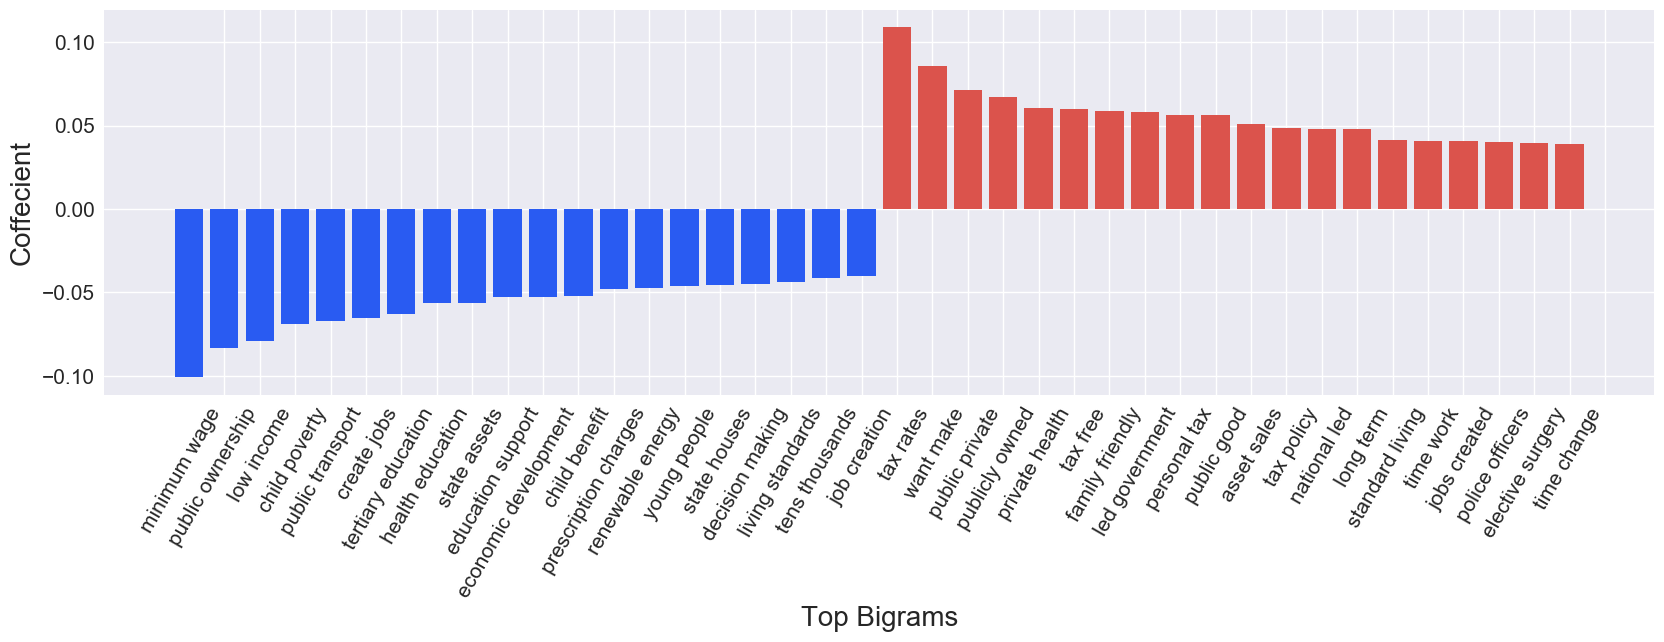

In [944]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[::-1][0:top_features]
    top_negative_coefficients = np.argsort(coef)[0:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize= (20, 5))
    colors_item = []
    for c in coef[top_coefficients]:
        if c < 0: 
            colors_item.append('#295bf2')
        else:
            colors_item.append('#db534c')
    #col = [('red' if c < 0 else 'blue') for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors_item)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.tick_params(labelsize=15)
    plt.xlabel('Top Bigrams', fontsize = 20)
    plt.ylabel('Coffecient', fontsize = 20)
    plt.savefig('FEATURES_SVM_FILTERone20.png', dpi=300, bbox_inches='tight')



    plt.show()
    return top_coefficients
    
#vectorizer.fit(xtrain)
#print(len(vectorizer.vocabulary_))
#print(vectorizer.get_feature_names())
#xtrain = cv.transform(xtrain)

#svm = LinearSVC()
svmL.fit(xtrain, ytrain)
_idx_=plot_coefficients(svmL, vectorizer.get_feature_names())



#plt.savefig('FEATURES_SVM_FILTERONE.png')



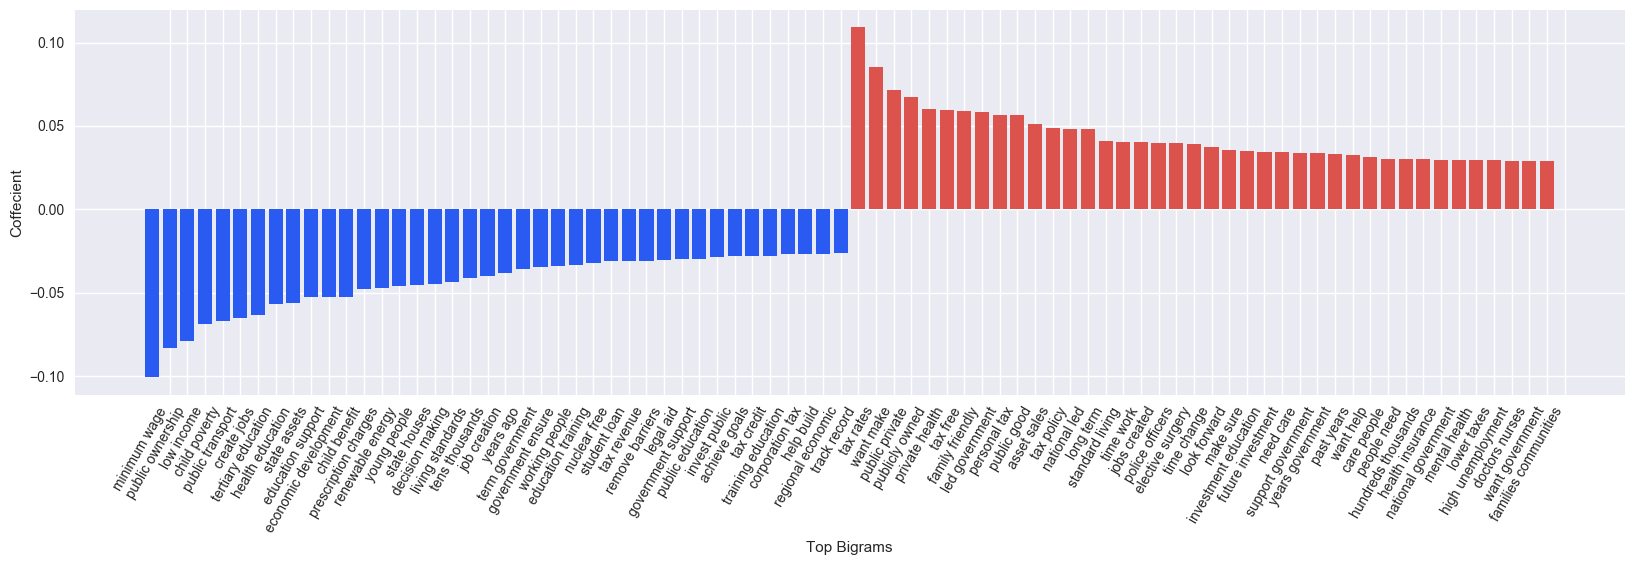

In [945]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


fig = plt.figure()

def plot_coefficients(classifier, feature_names, top_features=40):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[::-1][0:top_features]
    top_negative_coefficients = np.argsort(coef)[0:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(20, 5))
    colors_item = []
    for c in coef[top_coefficients]:
        if c < 0: 
            colors_item.append('#295bf2')
        else:
            colors_item.append('#db534c')
    #col = [('red' if c < 0 else 'blue') for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors_item)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    
    plt.xlabel('Top Bigrams')
    plt.ylabel('Coffecient')
    plt.savefig('FEATURES_SVM_FILTERone40.png', dpi=300, bbox_inches='tight')


    plt.show()
    return top_coefficients
    
#vectorizer.fit(xtrain)
#print(len(vectorizer.vocabulary_))
#print(vectorizer.get_feature_names())
#xtrain = cv.transform(xtrain)

#svm = LinearSVC()
svmL.fit(xtrain, ytrain)
_idx_=plot_coefficients(svmL, vectorizer.get_feature_names())



#plt.savefig('FEATURES_SVM_FILTERONE.png')



# MNB

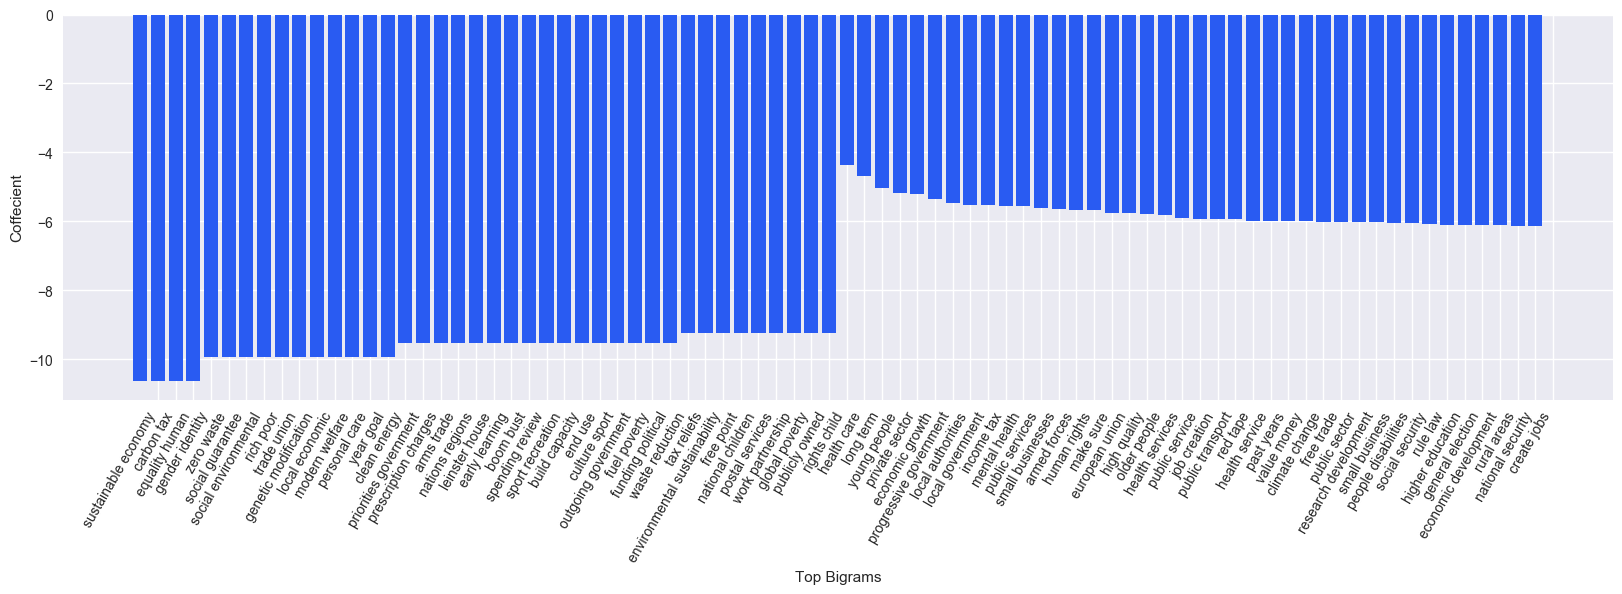

In [946]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=40):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[::-1][0:top_features]
    top_negative_coefficients = np.argsort(coef)[0:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(20, 5))
    colors_item = []
    for c in coef[top_coefficients]:
        if c < 0: 
            colors_item.append('#295bf2')
        else:
            colors_item.append('#db534c')
    #col = [('red' if c < 0 else 'blue') for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors_item)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xlabel('Top Bigrams')
    plt.ylabel('Coffecient')
    plt.savefig('FEATURES_MNB_FILTERone40.png', dpi=300, bbox_inches='tight')


    plt.show()
    return top_coefficients
    
#vectorizer.fit(xtrain)
#print(len(vectorizer.vocabulary_))
#print(vectorizer.get_feature_names())
#xtrain = cv.transform(xtrain)

#svm = LinearSVC()
MNB.fit(xtrain, ytrain)
_idx_=plot_coefficients(MNB, vectorizer.get_feature_names())

#plt.savefig('FEATURES_MNB_FILTERONE.png')




2000
[u'ability pay', u'able make', u'access affordable', u'access capital', u'access education', u'access health', u'access high', u'access justice', u'access public', u'access quality', u'access services', u'accident compensation', u'achieve goal', u'achieve goals', u'act believes', u'act ensure', u'act goals', u'act make', u'act proposals', u'action plan', u'action taken', u'active duty', u'active role', u'actively promote', u'additional billion', u'additional funding', u'additional million', u'additional resources', u'address issue', u'address issues', u'adequate funding', u'adequate resources', u'adult education', u'adult literacy', u'advisory committee', u'advisory group', u'aer lingus', u'affordable health', u'affordable homes', u'affordable housing', u'agri food', u'agricultural policy', u'agriculture food', u'aid programme', u'aim ensure', u'air force', u'air pollution', u'air quality', u'air water', u'alliance government', u'allow local', u'allow people', u'americans access',

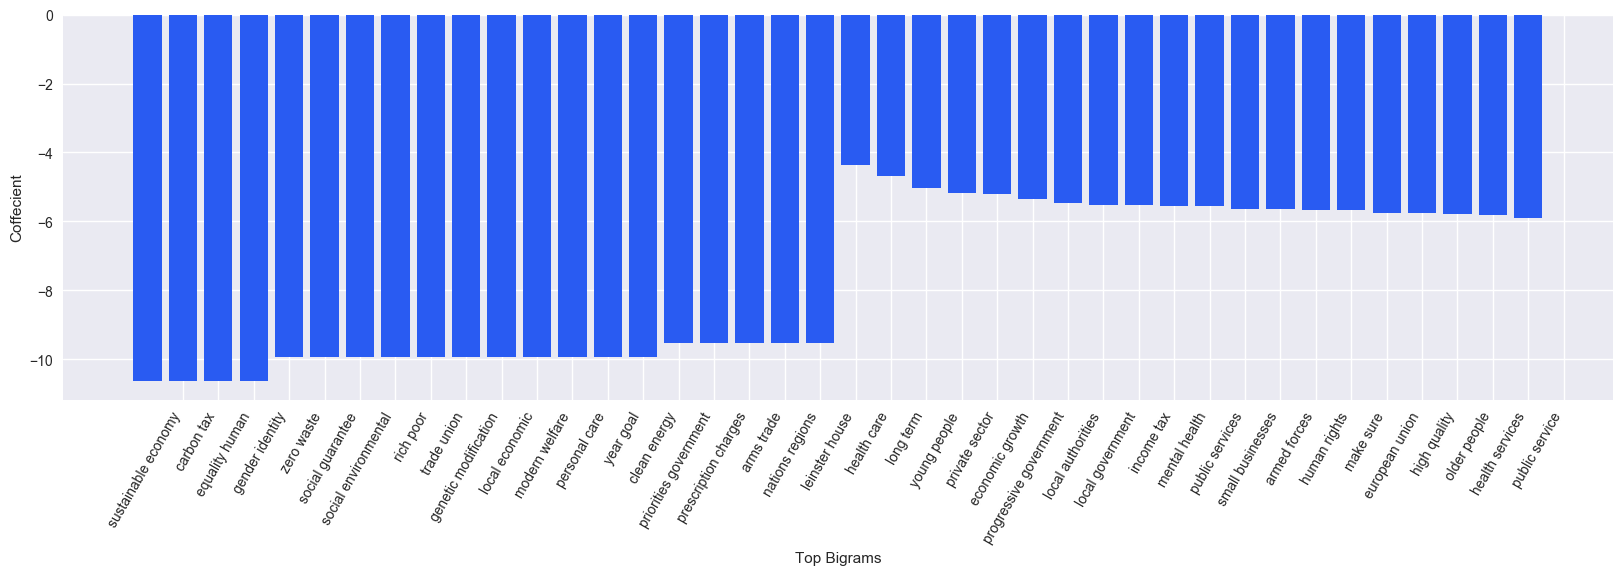

In [947]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[::-1][0:top_features]
    top_negative_coefficients = np.argsort(coef)[0:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(20, 5))
    colors_item = []
    for c in coef[top_coefficients]:
        if c < 0: 
            colors_item.append('#295bf2')
        else:
            colors_item.append('#db534c')
    #col = [('red' if c < 0 else 'blue') for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors_item)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xlabel('Top Bigrams')
    plt.ylabel('Coffecient')
    plt.savefig('FEATURES_MNB_FILTERone20.png', dpi=300, bbox_inches='tight')

    plt.show()
    return top_coefficients
    
#vectorizer.fit(xtrain)
print(len(vectorizer.vocabulary_))
print(vectorizer.get_feature_names())
#xtrain = cv.transform(xtrain)

#svm = LinearSVC()
MNB.fit(xtrain, ytrain)
_idx_=plot_coefficients(MNB, vectorizer.get_feature_names())

#plt.savefig('FEATURES_MNB_FILTERONE.png')


# Log Reg

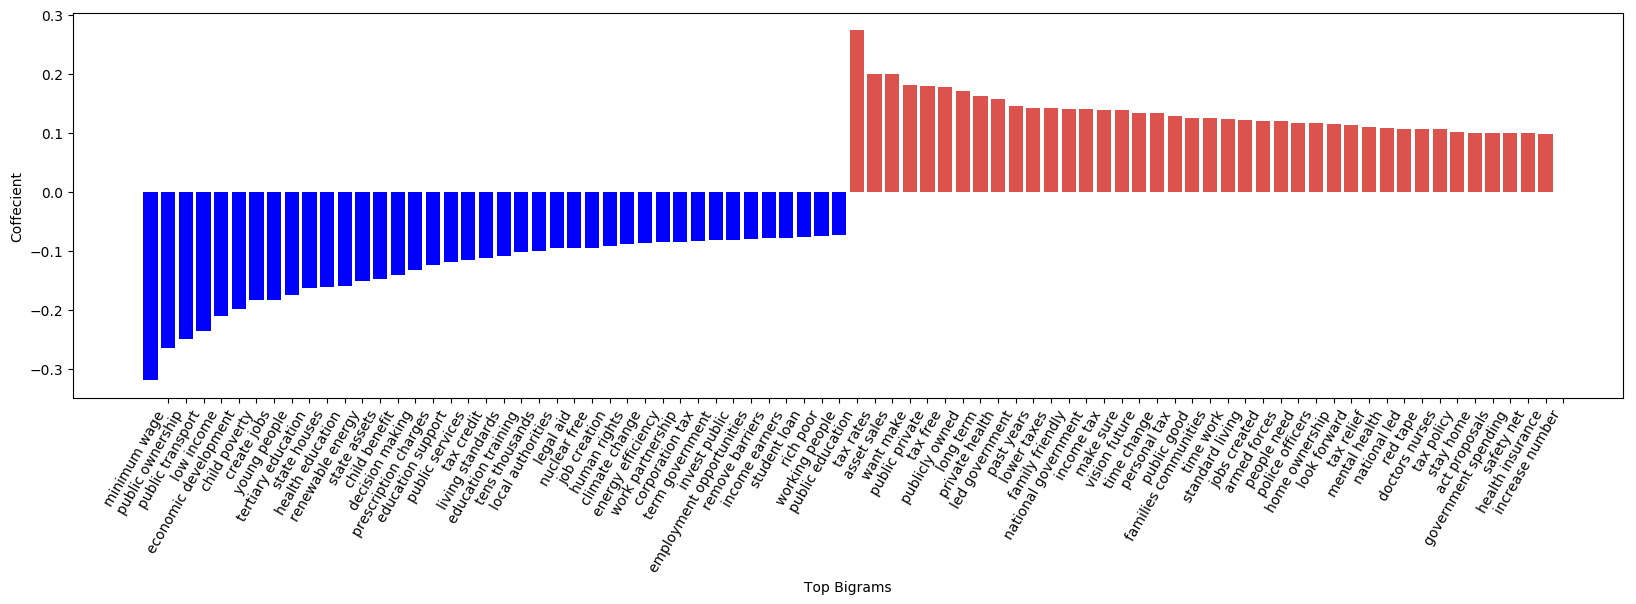

In [956]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=40):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[::-1][0:top_features]
    top_negative_coefficients = np.argsort(coef)[0:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(20, 5))
    colors_item = []
    for c in coef[top_coefficients]:
        if c < 0: 
            colors_item.append('blue')
        else:
            colors_item.append('#db534c')
    #col = [('red' if c < 0 else 'blue') for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors_item)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xlabel('Top Bigrams')
    plt.ylabel('Coffecient')
    plt.savefig('FEATURES_logreg_FILTERone40.png', dpi=300, bbox_inches='tight')



    plt.show()
    return top_coefficients
    
#vectorizer.fit(xtrain)
#print(len(vectorizer.vocabulary_))
#print(vectorizer.get_feature_names())
#xtrain = cv.transform(xtrain)

#svm = LinearSVC()
logReg.fit(xtrain, ytrain)
_idx_=plot_coefficients(logReg, vectorizer.get_feature_names())

#plt.savefig('FEATURES_LOGREG_FILTERONE.png')





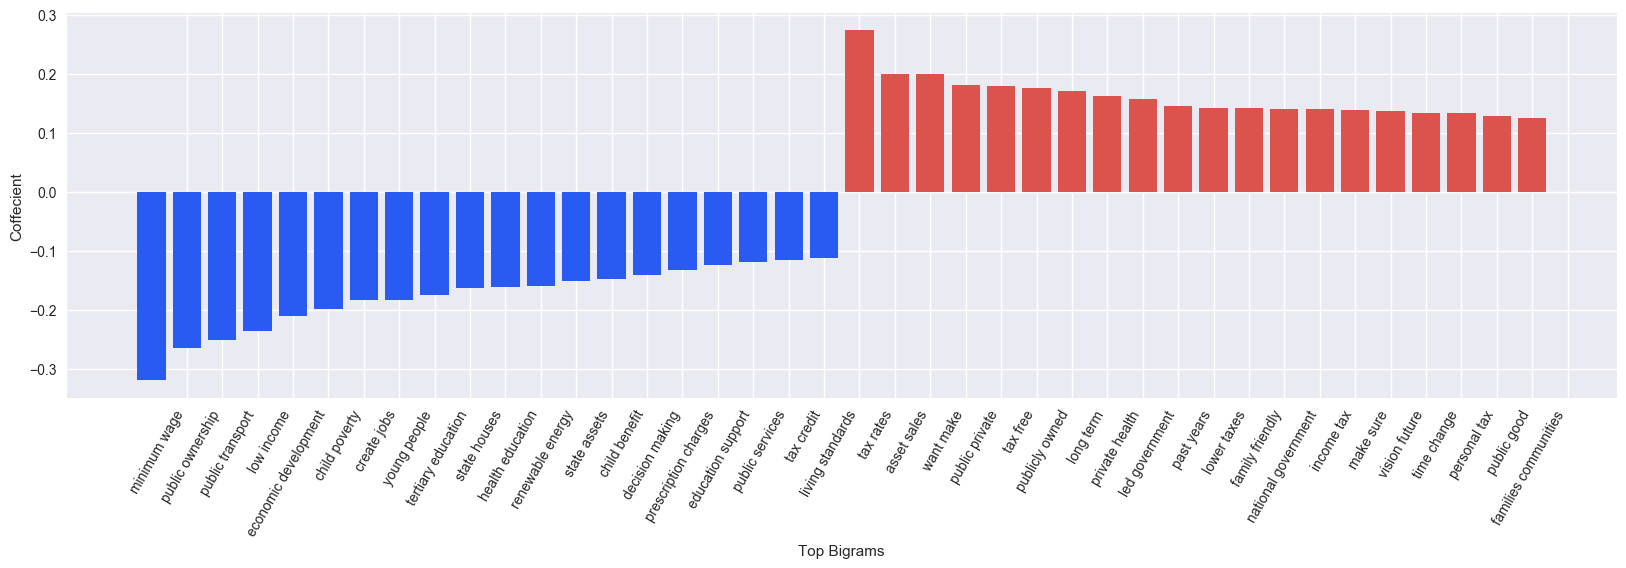

In [949]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[::-1][0:top_features]
    top_negative_coefficients = np.argsort(coef)[0:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(20, 5))
    colors_item = []
    for c in coef[top_coefficients]:
        if c < 0: 
            colors_item.append('#295bf2')
        else:
            colors_item.append('#db534c')
    #col = [('red' if c < 0 else 'blue') for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors_item)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xlabel('Top Bigrams')
    plt.ylabel('Coffecient')   
    #plt.savefig('FEATURES_LOGREG_FILTERONE.png')
    plt.savefig('FEATURES_logreg_FILTERone40.png', dpi=300, bbox_inches='tight')


    plt.show()
    return top_coefficients
    
#vectorizer.fit(xtrain)
#print(len(vectorizer.vocabulary_))
#print(vectorizer.get_feature_names())
#xtrain = cv.transform(xtrain)

#svm = LinearSVC()
logReg.fit(xtrain, ytrain)
_idx_=plot_coefficients(logReg, vectorizer.get_feature_names())

#plt.savefig('FEATURES_LOGREG_FILTERONE.png')




# MNB

Normalized confusion matrix
[[ 0.6   0.4 ]
 [ 0.05  0.95]]


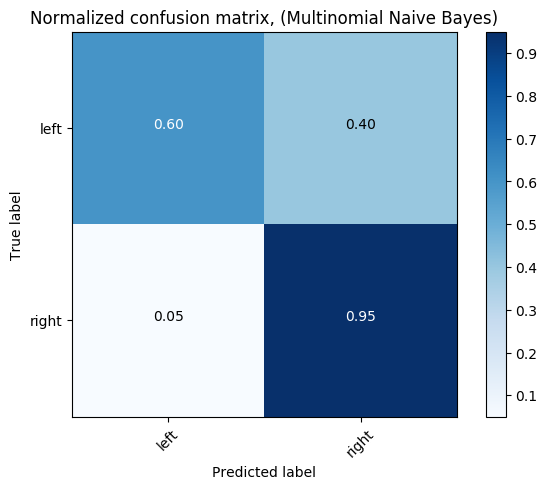

In [950]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
plt.style.use('default')


# import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = y.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)

class_names = ['left','right']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, MNBtest)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization, (Multinomial Naive Bayes)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, (Multinomial Naive Bayes)')
plt.savefig('CF_MNB_oneFILTER.png', dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig('CF_MNB_FILTER_ONE.png')




# SVM

Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.25  0.75]]


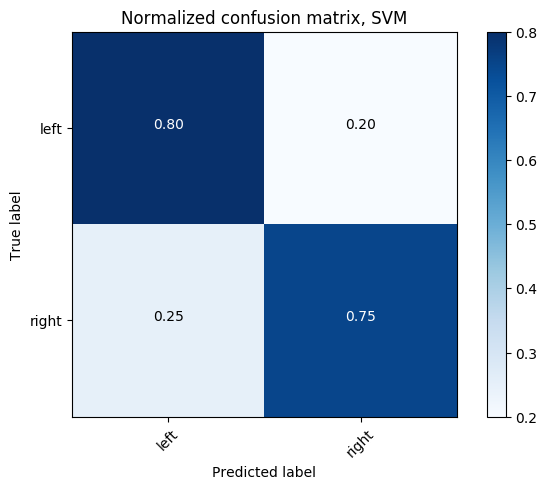

In [951]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = y.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)

class_names = ['left','right']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, svmLtest)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization, SVM')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, SVM')
plt.savefig('CF_SVM_oneFILTER.png', dpi=300, bbox_inches='tight')


plt.show()
#plt.savefig('CF_SVM_FILTER_ONE.png')




Normalized confusion matrix
[[ 0.8  0.2]
 [ 0.1  0.9]]


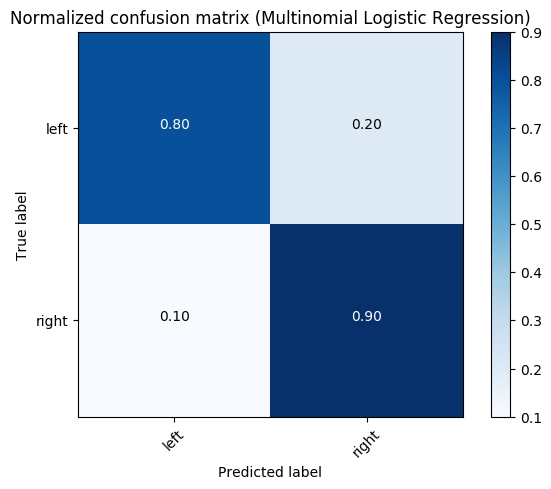

In [952]:
class_names = ['left','right']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, logRegTest)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization (Multinomial Logistic Regression)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (Multinomial Logistic Regression)')
plt.savefig('CF_LOGREG_oneFILTER.png', dpi=300, bbox_inches='tight')


plt.show()

#plt.savefig('CF_LOGREG_FILTERONE.png')




In [953]:
_idx_.shape

(40,)

In [954]:
result = []
for i in range(len(xtrain)):
    result.append(np.take(xtrain[i,:2000],_idx_))

In [955]:
np.array(result).shape
new_features = np.asarray(result)

In [902]:
#np.squeeze(np.transpose(np.array(result),[0,2,1]))

In [958]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import pylab as plt
import matplotlib.pyplot as plt 

pca = PCA(n_components=5).fit(new_features)
pca_2d = pca.transform(new_features)

kmeans = KMeans(n_clusters=2, random_state=111)
kmeans.fit(new_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

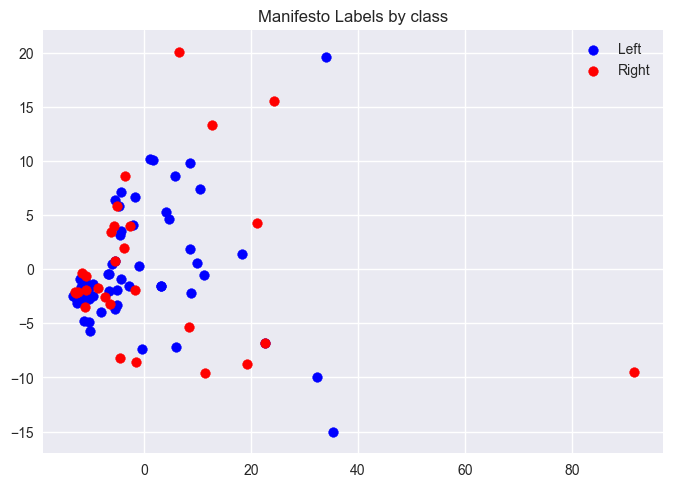

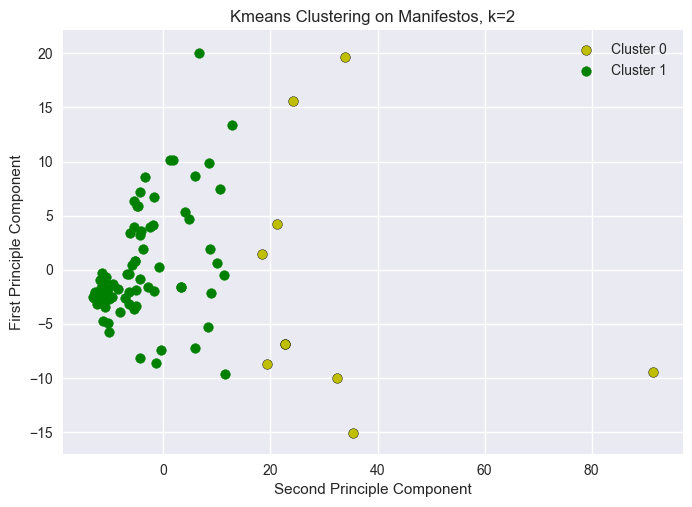

In [960]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

for i in range(0, pca_2d.shape[0]):
    if manifesto_labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='o')
    elif manifesto_labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
plt.legend([c1, c2], ['Left', 'Right'])
plt.title('Manifesto Labels by class') 
plt.savefig('NF_2dScatter.png')
plt.show()


for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='o', edgecolor='k')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
plt.legend([c1, c2],['Cluster 0 ', 'Cluster 1'])
plt.title('Kmeans Clustering on Manifestos, k=2')
plt.ylabel("First Principle Component")
plt.xlabel("Second Principle Component") 
plt.savefig('NF_2d2clusters.png')
plt.show()




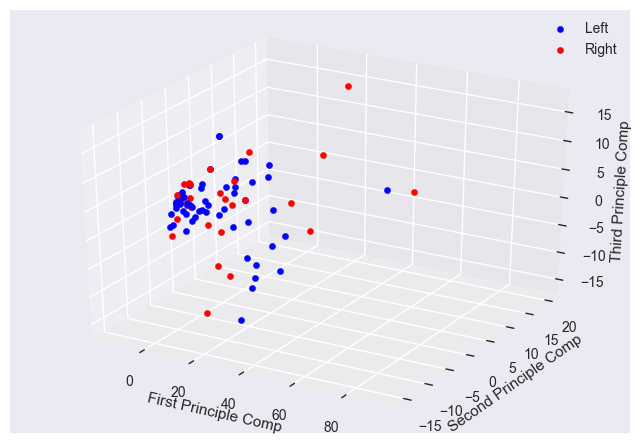

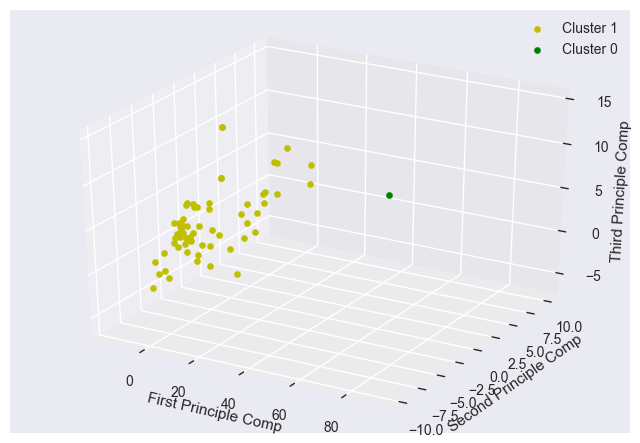

In [1023]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, pca_2d.shape[0]):
    if manifesto_labels[i] == 0:
        c1 = ax.scatter(pca_2d[i,0],pca_2d[i,1], pca_2d[i, 2],c='b',marker='o')
    elif manifesto_labels[i] == 1:
        c2 = ax.scatter(pca_2d[i,0],pca_2d[i,1],pca_2d[i, 2], c='r', marker='o')
    plt.legend([c1, c2],['Left', 'Right'])
    
ax.set_xlabel('First Principle Comp ')
ax.set_ylabel('Second Principle Comp ')
ax.set_zlabel('Third Principle Comp ')
plt.savefig('Ex13dsctter.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = ax.scatter(pca_2d[i,0],pca_2d[i,1], pca_2d[i, 2],c='y',marker='o')
    elif kmeans.labels_[i] == 1:
        c2 = ax.scatter(pca_2d[i,0],pca_2d[i,1],pca_2d[i, 2], c='g', marker='o')
    plt.legend([c1, c2],['Cluster 1', 'Cluster 0'])
    
ax.set_xlabel('First Principle Comp ')
ax.set_ylabel('Second Principle Comp ')
ax.set_zlabel('Third Principle Comp ')
plt.savefig('NF3d.png')


plt.show()




In [963]:
idx1 = kmeans.labels_==1
idx0 = kmeans.labels_==0

In [965]:
cl1 = new_features[idx1]
cl0 = new_features[idx0]

In [966]:
cluster1mans = np.where((idx1==True))
cluster0mans = np.where((idx0==True))

In [967]:
c1 = raw_manifestos.iloc[cluster1mans]
c1

,content,labels
4,Britain forward not back Contents Preface by...,0
15,United Left Alliance Candidate pledge and Prog...,0
30,The 2000 Democratic National Platform: Prosper...,0
40,GREEN PARTY OF AOTEAROA NEW ZEALAND Green Par...,0
50,Labour gave us ... Free Healthcare Universal S...,0
76,The Next Steps Forward for an Ireland that is ...,1
79,PREAMBLE As we come together to declare our vi...,1
82,REPUBLICAN PLATFORM 2000 Renewing America's Pu...,1
83,INTRODUCTION AND PREAMBLE One hundred and fift...,1
85,We Believe in America This platform is dedicat...,1


In [968]:
c0 = raw_manifestos.iloc[cluster0mans]
c0

,content,labels
0,Coder Name: Michelle Springfield Coding Finish...,0
1,Coder Name: Michelle Springfield Coding Finish...,0
2,Britain will be better with new Labour We wil...,0
3,Ambitions for Britain. Labour’s manifesto 200...,0
5,l Coder Name: Michelle Springfield Coding Fini...,0
6,Coder Name: Michelle Springfield Coding Finish...,0
7,Which party will make a real difference to my ...,0
8,LIBERAL DEMOCRAT 2001 GENERAL ELECTION MANIFES...,0
9,The Real Alternative Applicability note: Lib...,0
10,l Coder Name: Michelle Springfield Coding Fini...,0


In [1019]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as plt

pca = PCA(n_components=3).fit(new_features)
pca_2d = pca.transform(new_features)

kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(new_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

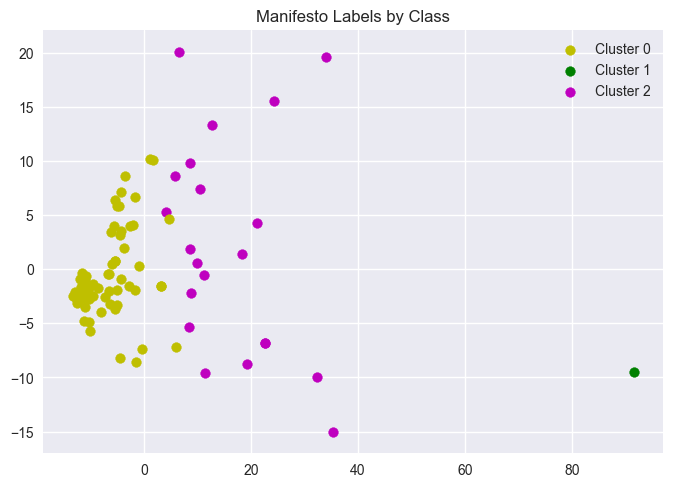

In [1020]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='o')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='o')
#     elif kmeans.labels_[i] == 2:
#         c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='o')
# #     elif kmeans.labels_[i] == 2:
#         c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='grey', marker='o')

plt.legend([c1, c2, c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Manifesto Labels by Class') 
plt.savefig('NF_2dTHREEclustersScatter.png')


plt.show()

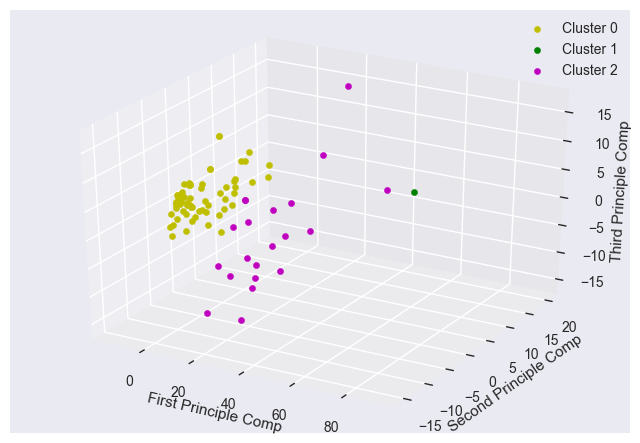

In [1022]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = ax.scatter(pca_2d[i,0],pca_2d[i,1], pca_2d[i, 2],c='y',marker='o')
    elif kmeans.labels_[i] == 1:
        c2 = ax.scatter(pca_2d[i,0],pca_2d[i,1],pca_2d[i, 2], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = ax.scatter(pca_2d[i,0],pca_2d[i,1],pca_2d[i, 2], c='m', marker='o')
    plt.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
    
ax.set_xlabel('First Principle Comp ')
ax.set_ylabel('Second Principle Comp ')
ax.set_zlabel('Third Principle Comp ')
plt.savefig('NF_3CLUSTERS2dScatter.png')


plt.show()



In [1011]:
idx1 = kmeans.labels_==1
idx0 = kmeans.labels_==0
idx2 = kmeans.labels_==2
idx3 = kmeans.labels_==3
#idx4 = kmeans.labels_==4


In [1012]:
cl1 = new_features[idx1]
cl0 = new_features[idx0]
cl2 = new_features[idx2]
cl3 = new_features[idx3]
#cl4 = new_features[idx4]


cluster1mans = np.where((idx1==True))
cluster0mans = np.where((idx0==True))
cluster2mans = np.where((idx2==True))
cluster3mans = np.where((idx3==True))
#cluster4mans = np.where((idx4==True))

In [1013]:
raw_manifestos.iloc[cluster0mans]

,content,labels
0,Coder Name: Michelle Springfield Coding Finish...,0
1,Coder Name: Michelle Springfield Coding Finish...,0
5,l Coder Name: Michelle Springfield Coding Fini...,0
12,What Scotland needs now! “The SNP are proposin...,0
17,“WHEN YOU HAVE CUT DOWN THE LAST TREE AND POLL...,0
23,OUR VALUES. This election is about values. In...,0
33,Moving America Forward 2012 Democratic Nationa...,0
42,Make a difference that will last for generatio...,0
43,"Norman: Green Party Campaign Launch Monday, 6 ...",0
47,ACC. LABOUR’S VISION. Nearly thirty years ago...,0


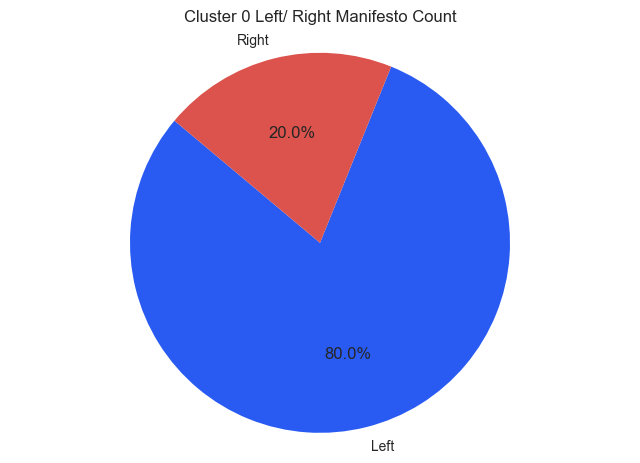

In [1014]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

labels = 'Left', 'Right'
sizes = [12, 3]
colors = sns.color_palette("Paired")


#colors = sns.color_palette("Blues_r")
#colors = ['b', 'r']
#colors = sns.color_palette("RdBu_r", 7)
#colors = sns.diverging_palette(255, 133, l=60, n=7, center="dark")
#colors = sns.color_palette("coolwarm", 7)

plt.title('Cluster 0 Left/ Right Manifesto Count')
# Plot
plt.pie(sizes, labels=labels, colors=["#295bf2", "#db534c"],
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
plt.savefig('NF_clus0.png')

plt.show()

In [1015]:
raw_manifestos.iloc[cluster1mans]

,content,labels
79,PREAMBLE As we come together to declare our vi...,1


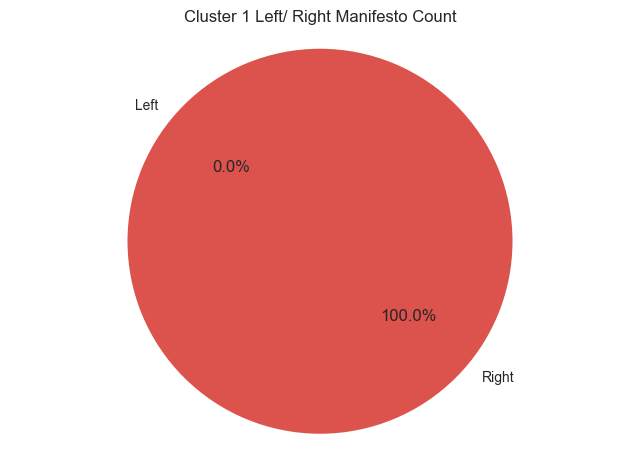

In [1005]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

labels = 'Left', 'Right'
sizes = [0, 2]
colors = sns.color_palette("Paired")


#colors = sns.color_palette("Blues_r")
#colors = ['b', 'r']
#colors = sns.color_palette("RdBu_r", 7)
#colors = sns.diverging_palette(255, 133, l=60, n=7, center="dark")
#colors = sns.color_palette("coolwarm", 7)

plt.title('Cluster 1 Left/ Right Manifesto Count')
# Plot
plt.pie(sizes, labels=labels, colors=["#295bf2", "#db534c"],
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
plt.savefig('NF_clus1.png')

plt.show()

In [1016]:
raw_manifestos.iloc[cluster2mans]

,content,labels
2,Britain will be better with new Labour We wil...,0
3,Ambitions for Britain. Labour’s manifesto 200...,0
6,Coder Name: Michelle Springfield Coding Finish...,0
7,Which party will make a real difference to my ...,0
8,LIBERAL DEMOCRAT 2001 GENERAL ELECTION MANIFES...,0
9,The Real Alternative Applicability note: Lib...,0
10,l Coder Name: Michelle Springfield Coding Fini...,0
11,Coder Name: Michelle Springfield Coding Finish...,0
13,Heart of the Manifesto 2001 Our Platform We st...,0
14,Coder Name: Michelle Springfield Coding Finish...,0


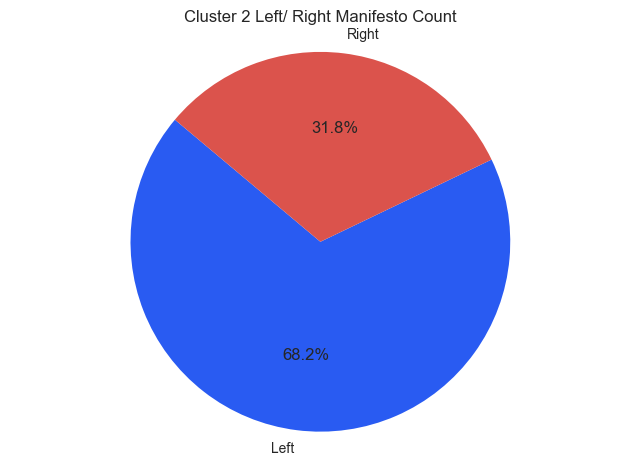

In [1017]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

labels = 'Left', 'Right'
sizes = [58, 27]
colors = sns.color_palette("Paired")


#colors = sns.color_palette("Blues_r")
#colors = ['b', 'r']
#colors = sns.color_palette("RdBu_r", 7)
#colors = sns.diverging_palette(255, 133, l=60, n=7, center="dark")
#colors = sns.color_palette("coolwarm", 7)

plt.title('Cluster 2 Left/ Right Manifesto Count')
# Plot
plt.pie(sizes, labels=labels, colors=["#295bf2", "#db534c"],
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
plt.savefig('NF_clus2.png')

plt.show()

In [1018]:
raw_manifestos.iloc[cluster3mans]

,content,labels
4,Britain forward not back Contents Preface by...,0
15,United Left Alliance Candidate pledge and Prog...,0
30,The 2000 Democratic National Platform: Prosper...,0
40,GREEN PARTY OF AOTEAROA NEW ZEALAND Green Par...,0
50,Labour gave us ... Free Healthcare Universal S...,0
76,The Next Steps Forward for an Ireland that is ...,1
82,REPUBLICAN PLATFORM 2000 Renewing America's Pu...,1
83,INTRODUCTION AND PREAMBLE One hundred and fift...,1
85,We Believe in America This platform is dedicat...,1


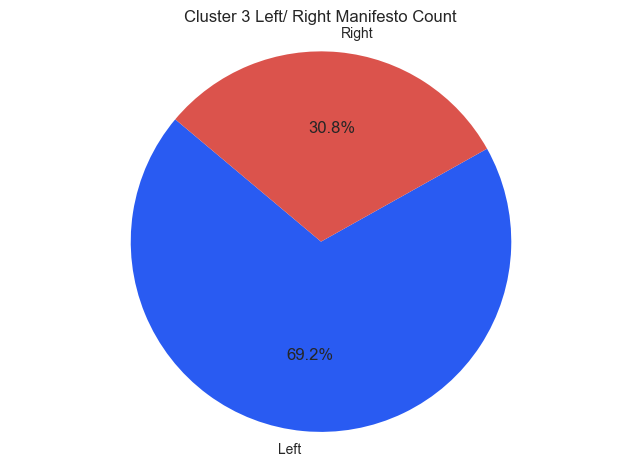

In [1007]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

labels = 'Left', 'Right'
sizes = [9, 4]
colors = sns.color_palette("Paired")


#colors = sns.color_palette("Blues_r")
#colors = ['b', 'r']
#colors = sns.color_palette("RdBu_r", 7)
#colors = sns.diverging_palette(255, 133, l=60, n=7, center="dark")
#colors = sns.color_palette("coolwarm", 7)

plt.title('Cluster 3 Left/ Right Manifesto Count')
# Plot
plt.pie(sizes, labels=labels, colors=["#295bf2", "#db534c"],
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
plt.savefig('NF_clus3.png')

plt.show()

In [1003]:
raw_manifestos.iloc[cluster4mans]

,content,labels
50,Labour gave us ... Free Healthcare Universal S...,0
